This notebook contain utility code used for creating some charts that are used in creating definition images and other miscellaneous figures

In [4]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from src.generate_ode import ode_gen_qcrispri, ode_gen_qcrispri_simple, ode_gen_qcrispri_sponge, ode_gen_quorum
from src.calculate_metrics import CalculateDynamicsMetrics
from src.solve_ode import solve_qcrispri, solve_qcrispri_simple, solve_qcrispri_sponge, solve_quorum, t
from src.plots import vertical_stack_plot_3
from src.sensitivity_analysis import vary_two_parameter #changed twoparam_vary bcz there is no function like that.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


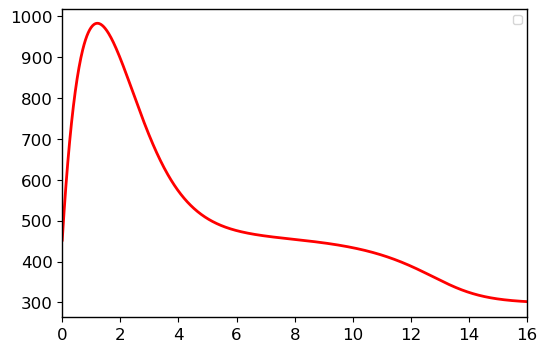

In [5]:
qcrispri_df = solve_qcrispri()


#Plot GFP vs Time for "qCRISPRi MODEL"
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(t, qcrispri_df.GFP, linewidth = 2, color = 'red')
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1)
#ax.set_xlabel('Time (hr)', fontsize = 12)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 12)
ax.legend(prop={"size":8}, loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=8)
plt.legend()
plt.show()
fig.savefig('definitions.png', dpi=350, bbox_inches = "tight")

In [6]:
leaky = repr_paramData1[repr_paramData1['alphaT'] == alpha0]
nonleaky = repr_paramData1[repr_paramData1['alphaT'] == 0]
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (4,4))
ax1.plot(leaky.activity_ratio, leaky.max_gfp, color ='orange')
ax1.plot(nonleaky.activity_ratio, nonleaky.max_gfp, color = 'green')
ax2.plot(leaky.activity_ratio, leaky.switching_density, color ='orange')
ax2.plot(nonleaky.activity_ratio, nonleaky.switching_density, color = 'green')

ax1.tick_params(bottom = False)
ax1.set_xticklabels(labels = '')

plt.gca().invert_xaxis()
plt.xticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1],[40, 50, 60, 70, 80, 90])
fig.show()
#plt.savefig('Figures/repr_str_leaky_nonleaky1.png', dpi = 350, bbox_inches = 'tight')

NameError: name 'repr_paramData1' is not defined

NameError: name 'leaky' is not defined

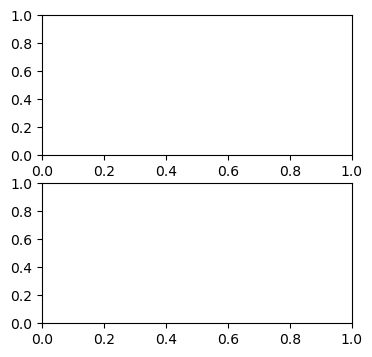

In [4]:
fig, (ax3, ax4) = plt.subplots(2,1, figsize = (4,4))
ax3.plot(leaky.activity_ratio, leaky.FoldRepression, color ='orange')
ax3.plot(nonleaky.activity_ratio, nonleaky.FoldRepression, color = 'green')
ax4.plot(leaky.activity_ratio, leaky.Transition_time, color ='orange')
ax4.plot(nonleaky.activity_ratio, nonleaky.Transition_time, color = 'green')

ax3.tick_params(bottom = False)
ax3.set_xticklabels(labels = '')

plt.gca().invert_xaxis()
plt.xticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1],[40, 50, 60, 70, 80, 90])
fig.show()
plt.savefig('Figures/repr_str_leaky_nonleaky2.png', dpi = 350, bbox_inches = 'tight')